# Simple Linear Regression using Statsmodel library

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing all the libraries
2. Understanding the structure of the data

In [11]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
adv = pd.read_csv('advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [19]:
adv.shape

(200, 4)

In [20]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [21]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [22]:
adv.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

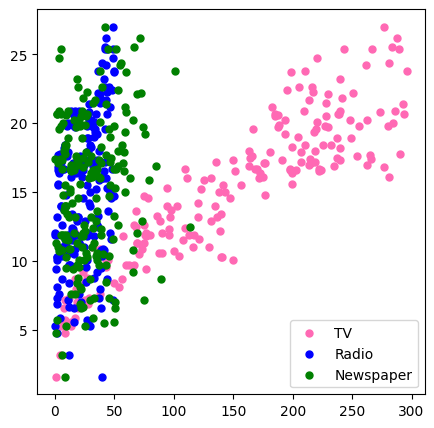

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(x = adv['TV'],y= adv['Sales'],c= 'hotpink', s = 25, label="TV")
plt.scatter(x = adv['Radio'],y= adv['Sales'],c= 'blue', s = 25, label="Radio")
plt.scatter(x = adv['Newspaper'],y= adv['Sales'],c= 'green', s = 25, label="Newspaper")
plt.legend()
plt.show()

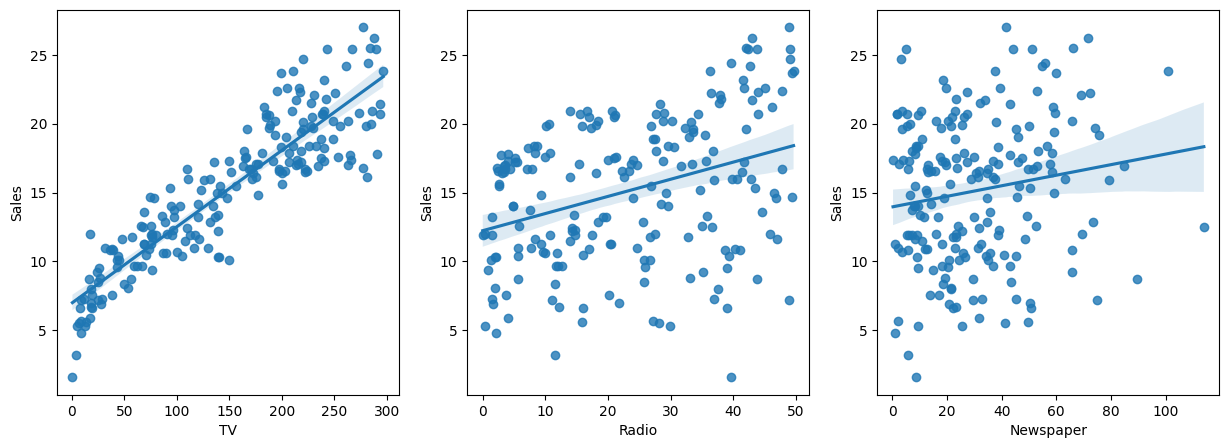

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.regplot(x = adv['TV'],y= adv['Sales'])

plt.subplot(1,3,2)
sns.regplot(x = adv['Radio'],y= adv['Sales'])

plt.subplot(1,3,3)
sns.regplot(x = adv['Newspaper'],y= adv['Sales'])
plt.show()

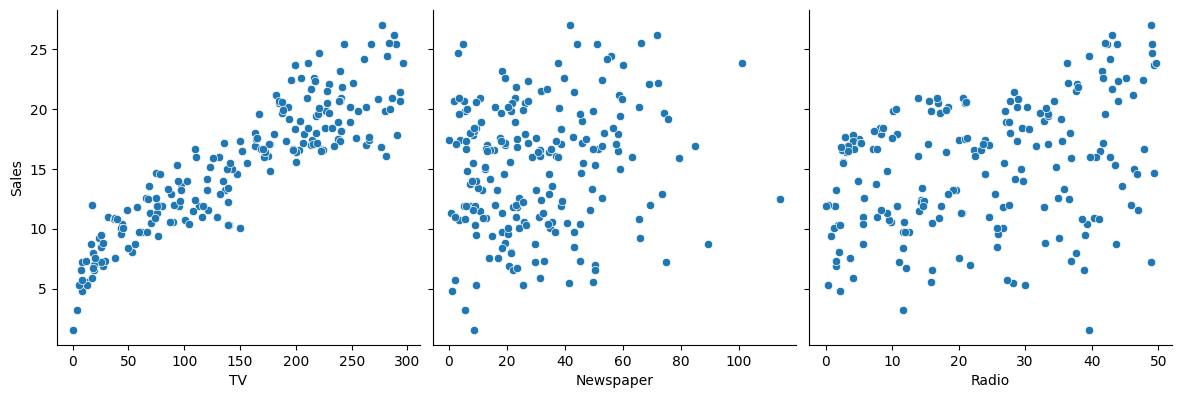

In [25]:
sns.pairplot(adv, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

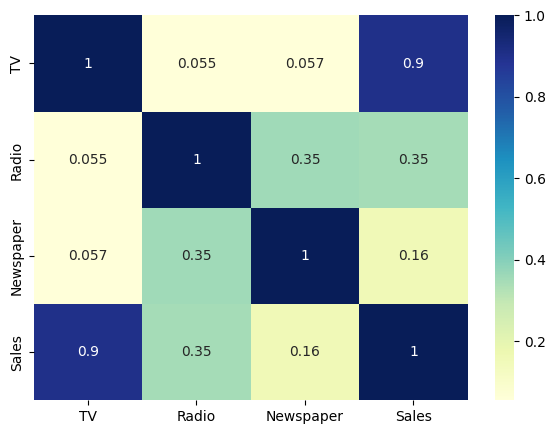

In [26]:
plt.figure(figsize=(7,5))
sns.heatmap(adv.corr(),cmap="YlGnBu",annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

**Steps**:

1. Create X(Predictor variable) and y(Target variable).
2. Create train and test sets from the original data.
3. Train your model on the training set.(learn the co-efficients)
4. Evaluate the model. (train and test sets)

**Create Variables**

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [29]:
#Create X(Predictor variable) and y(Target variable).
X = adv['TV']
y = adv['Sales']

**Train-Test Split**

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [30]:
#Create train and test sets from the original data.
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3,random_state=100)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140,), (60,), (140,), (60,))

In [32]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [33]:
y_test.head()

,Sales
126,6.6
104,20.7
99,17.2
92,19.4
111,21.8


**Training the model**

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below.

In [34]:
#training the model

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

# y = c + m1.X1
# y = c.const + m1.X1

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


**Fitting the model**

We will use the OLS techinque to fit the model. This gives the co-effiecients of predictor and target variables.

Here, OLS stands for Ordinary Least Squares, which is the method that 'statsmodels' use to fit the line. You use the command 'add_constant' so that statsmodels also fits an intercept. If you don't use this command, it will fit a line passing through the origin by default.

In [35]:
#Fitting the model

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

In [36]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_model.params

,0
const,6.948683
TV,0.054546


Linear Equation for the TV Variable against Sales is **Sales = 6.948683 + 0.054546 * TV**

In [37]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           1.52e-52
Time:                        10:51:34   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

The values we are concerned with are -
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`.

Therefore highly fitted as it is near to 1. Highly co-related.

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

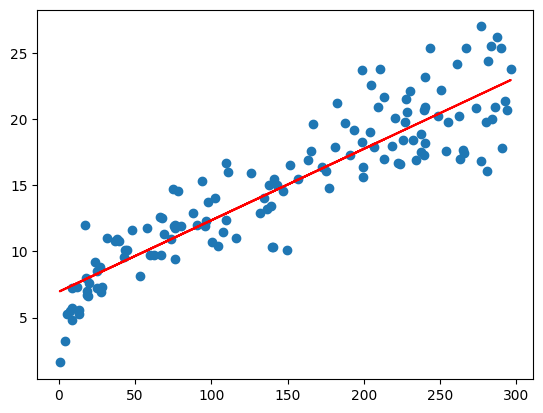

In [38]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

---
## Step 4: Residual Analysis

In [39]:
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

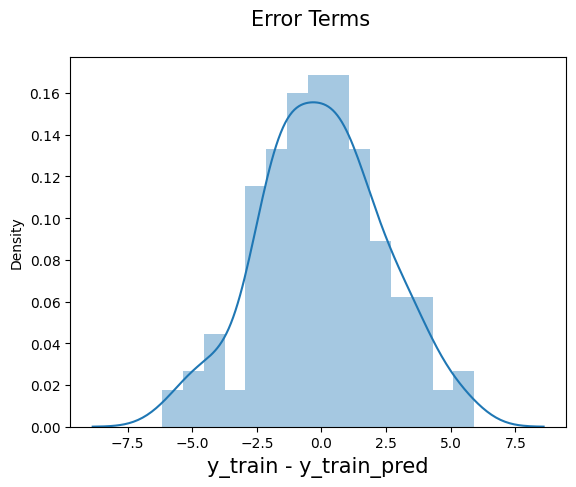

In [40]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

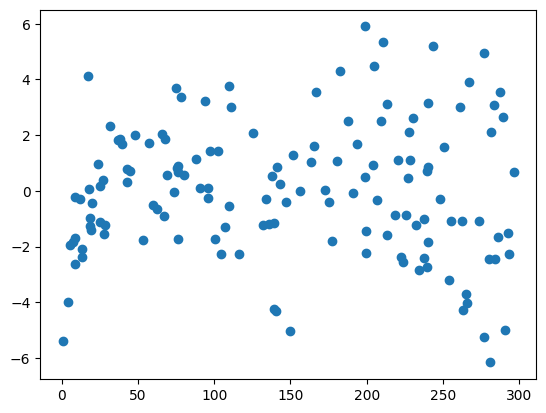

In [41]:
plt.scatter(X_train,res)
plt.show()

---
## Step 5: Predictions on the test set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [42]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr_model.predict(X_test_sm)

In [43]:
y_test_pred.head()

,0
126,7.374140
104,19.941482
99,14.323269
92,18.823294
111,20.132392


In [44]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

2.019296008966232

In [45]:
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_train

0.8157933136480389

In [46]:
r_squared_test = r2_score(y_test, y_test_pred)
r_squared_test

0.792103160124566

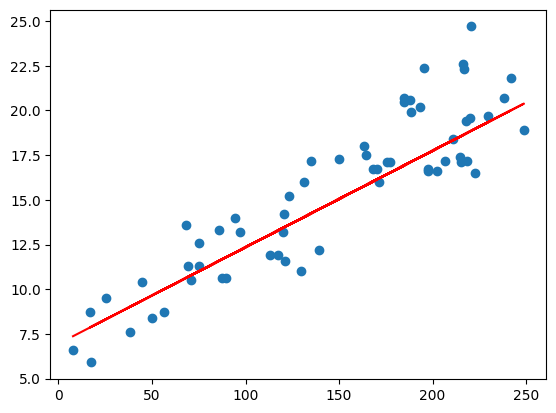

In [47]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

# Simple Linear Regression using sklearn library

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
#Create X(Predictor variable) and y(Target variable).
X_sk = adv['TV']
y_sk = adv['Sales']

In [50]:
#Create train and test sets from the original data.
X_train_sk,X_test_sk,y_train_sk,y_test_sk = train_test_split(X_sk,y_sk,train_size = 0.7,test_size = 0.3,random_state=100)

In [51]:
#Steps in sklearn model building

#1. Create a linear regression object
lm_sk = LinearRegression()

In [52]:
X_train_sk.shape

(140,)

In [53]:
X_train_lm = X_train_sk.values.reshape(-1,1)
X_Test_lm = X_test_sk.values.reshape(-1,1)

In [54]:
#2. Fit the model
lm_sk.fit(X_train_lm,y_train_sk)

LinearRegression()

In [56]:
#3. See the parameters
print(lm_sk.coef_)
print(lm_sk.intercept_)

[0.05454575]
6.948683200001357


In [57]:
#4. Make predictions (train and test)
y_train_pred_sk = lm_sk.predict(X_train_lm)
y_test_pred_sk = lm_sk.predict(X_Test_lm)

In [58]:
#5. Evaluate R2 score
r_squared_train_sk = r2_score(y_train_sk, y_train_pred_sk)
r_squared_train_sk

0.8157933136480389

In [59]:
r_squared_test_sk = r2_score(y_test_sk, y_test_pred_sk)
r_squared_test_sk

0.7921031601245662